# Exercise 6: PyTorch Introduction

## 1. Setup

### 1.1 Install dependencies

In [1]:
import sys
!{sys.executable} -m pip install torch torchvision
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm                      # this gives us a pretty progress bar

### 1.2 Check if GPU available

Our prospective deep learning model requires billions of operations to work, all of which can be parallelised by letting them run on the Graphics Processing Unit (GPU).
PyTorch has full support for GPUs and we will make use of it already in this exercise. So let's first test if you have GPU availability.

Run the following code block and proceed if the response is `True`. Else see an instructor.

In [1]:
import torch

print(torch.cuda.is_available())

True


## 2. Basic Tensor operations

In the first exercise you got introduced to NumPy, which allows you to create and manipulate matrices, or n-dimensional arrays (`numpy.ndarray`).
PyTorch offers very similar functionality, but with extra functionality for machine and especially deep learning. In PyTorch, matrices are called "Tensors".

Let us take a look at some basic Tensor operations in PyTorch. Below you find some code written in NumPy. Try and translate it to perform the same operations in PyTorch (wherever it says `#TODO`).
In the end, your code should be able to run without any call to NumPy (`np.*`).

Tips:
* To convert from PIL image to torch.Tensor, you can use `torchvision.transforms.ToTensor`. Just be aware that this rescales the image values into [0,1] and arranges the tensor shape differently compared to `np.array(image)`.
* Conversely, for visualisation, you need to rearrange (`permute`) the dimensions again.

### 2.1 NumPy
Nothing to modify here.

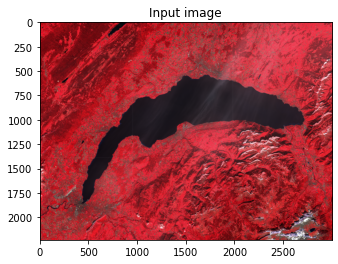

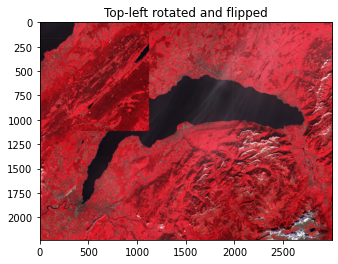

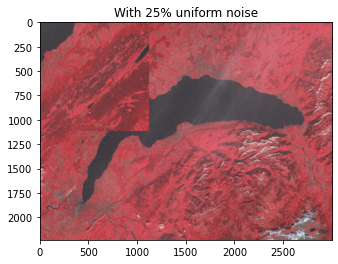

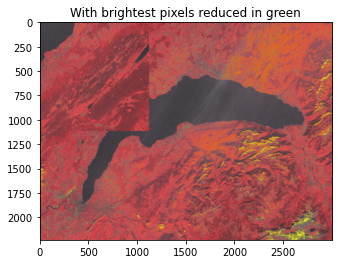

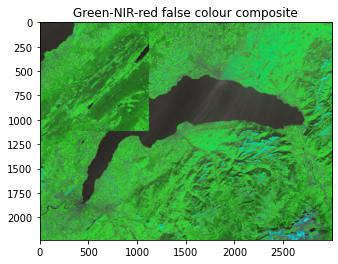

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# 1. Load image
image = Image.open('Sentinel_2_LakeGeneva.png')

# 2. Visualize
plt.imshow(image)
plt.title('Input image')
plt.show()

# 3. NumPy operations
arr = np.array(image)                           #TODO

# 3.1 Rotate top-left part of image by 90 degrees and flip it horizontally
sz = arr.shape                                  #TODO
corner = min(int(sz[0]//2), int(sz[1]//2))      #TODO
topLeft = arr[:corner, :corner, :]              #TODO
topLeft = np.rot90(topLeft)                     #TODO
topLeft = np.fliplr(topLeft)                    #TODO
arr[:corner, :corner, :] = topLeft              #TODO
plt.imshow(arr)                                 #TODO
plt.title('Top-left rotated and flipped')
plt.show()

# 3.2 Convert to 32-bit float and add 25% uniform noise
arr = arr.astype(np.float32) / 255.0            #TODO
arr += 0.25 * np.random.rand(*sz)               #TODO
arr /= np.max(arr)                              #TODO
plt.imshow(arr)                                 #TODO
plt.title('With 25% uniform noise')
plt.show()

# 3.3 Reduce the amount of green in the top-10% brightest pixels
lightValue = np.sum(arr, axis=2)                #TODO
threshold = np.quantile(lightValue, 0.9)        #TODO
mask = np.zeros(arr.shape, dtype=np.bool8)      #TODO
mask[:,:,2] = (lightValue >= threshold)         #TODO
arr[mask] *= 0.1                                #TODO
plt.imshow(arr)                                 #TODO
plt.title('With brightest pixels reduced in green')
plt.show()

# 3.4 Permute bands
arr = np.stack((arr[:,:,2], arr[:,:,0], arr[:,:,1]), axis=-1)           #TODO
plt.imshow(arr)                                 #TODO
plt.title('Green-NIR-red false colour composite')
plt.show()

### 2.2 PyTorch
Please convert all NumPy code to PyTorch. Make sure that the outputs match the ones from 2.1 in rough terms.

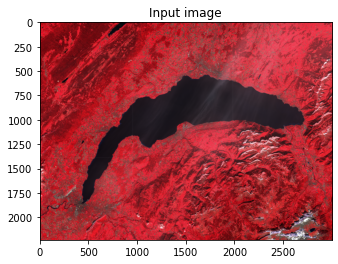

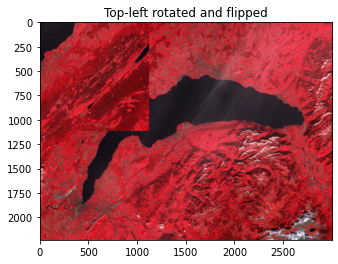

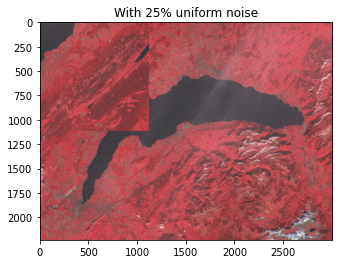

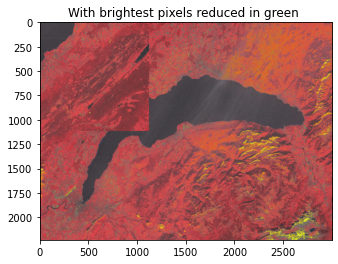

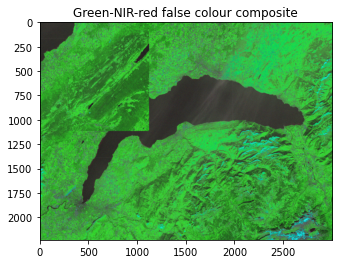

In [3]:
#TODO: implement your PyTorch solution here
import torch
import torchvision.transforms as tr
from PIL import Image
import matplotlib.pyplot as plt


# 1. Load image
image = Image.open('Sentinel_2_LakeGeneva.png')

# 2. Visualize
plt.imshow(image)
plt.title('Input image')
plt.show()

# 3. PyTorch operations
arr = tr.ToTensor()(image)                      #TODO

# 3.1 Rotate top-left part of image by 90 degrees and flip it horizontally
sz = arr.size()                                 #TODO
corner = min(int(sz[1]//2), int(sz[2]//2))      #TODO
topLeft = arr[:, :corner, :corner]              #TODO
topLeft = torch.rot90(topLeft, dims=(2,1))      #TODO
topLeft = torch.fliplr(topLeft)                 #TODO
arr[:, :corner, :corner] = topLeft              #TODO
plt.imshow(arr.permute((1,2,0)))                #TODO
plt.title('Top-left rotated and flipped')
plt.show()

# 3.2 Convert to 32-bit float and add 25% uniform noise
arr = arr.float()                               #TODO
arr += 0.25 * torch.rand(*sz)                   #TODO
arr /= torch.max(arr)                           #TODO
plt.imshow(arr.permute((1,2,0)))                #TODO
plt.title('With 25% uniform noise')
plt.show()

# 3.3 Reduce the amount of green in the top-10% brightest pixels
lightValue = torch.sum(arr, dim=0)              #TODO
threshold = torch.quantile(lightValue, 0.9)     #TODO
mask = torch.zeros(arr.size(), dtype=torch.bool)#TODO
mask[2,:,:] = (lightValue >= threshold)         #TODO
arr[mask] *= 0.1                                #TODO
plt.imshow(arr.permute((1,2,0)))                #TODO
plt.title('With brightest pixels reduced in green ')
plt.show()

# 3.4 Permute bands
arr = torch.stack((arr[2,...], arr[0,...], arr[1,...]))           #TODO
plt.imshow(arr.permute((1,2,0)))                #TODO
plt.title('Green-NIR-red false colour composite')
plt.show()

## 3. Object-Oriented Programming (OOP)

We have seen how to manipulate tensors in PyTorch, which works very similarly to NumPy.
For deep learning, however, we want to apply such operations thousands of times for each data point (image, etc.) and each layer in the model.

Hence, we make use of **Object-Oriented Programming** (OOP), which is a very general programming paradigm. Instead of writing all our operations in a long code file, we separate the parts of our code into "objects", or object classes.
Each such object class has a general definition of:
* its own properties (variables),
* its working procedures, organised into functions.

So, for example, we can create an object for our actual deep learning model, for which we need to program all of the layers it contains (properties/variables), as well as the order in which these layers are executed (working procedure).

Then, once we have this, we can create an **instance** of this object definition that we will use to train, predict, etc.


In Python, object classes are defined with the keyword `class`. For example:
```python
class Animal:
  def __init__(self, species='cat'):
    self.species = species
  
  def make_sound(self):
    if self.species == 'cat':
      print('meow!')
    else:
      print('woof!')
```
This code block defines an object class with name `Animal`. It has its own property (a variable named `species`) and one function (`make_sound`). The special function at the beginning (`def __init__(...)`) is called the **constructor** that is executed whenever you create a new instance of this object class.
In the example, the constructor takes one argument (`species`) that, in this case, is optional: if nothing is specified, `species` defaults to "cat". The special argument `self` is used to refer to the instance itself.
So with that, you can create different instances of your object class as follows:
```python

myCat = Animal()            # create a new instance and store it in variable "myCat". No argument supplied, so "species" defaults to "cat"
myCat.make_sound()          # call function "make_sound" for object instance "myCat". This will print "meow!" to the console.

myDog = Animal('dog')       # create another instance of the same object class, this time with argument "species" as "dog"
myDog.make_sound()          # we provided a custom value for argument "species", so this time the output of the function is "woof!".

myHorse = Animal('horse')   # another instance with a custom argument for variable "species"
myHorse.make_sound()        #TODO: what will this command do here?
```

### 3.1 PyTorch Model class

Let's apply this concept to a more serious use case: a prediction model. In PyTorch, models (of any scale) are implemented as object classes and must define the following functions:
* `def __init__(self, ...):`: the constructor of a model class; can be designed arbitrarily and primary defines which layers the model contains
* `def forward(self, x):`: a function receiving Tensor `x` and returning the model output (forward pass)

Let us now define a small model in PyTorch with the following architecture:
* Fully-connected layer, mapping from 256 inputs to 512 outputs (tip: `torch.nn.Linear`)
* Rectified Linear Unit (ReLU)
* Fully-connected layer, mapping from 512 to 1024
* ReLU
* Fully-connected layer, mapping from 1024 to `num_classes` (an argument we can supply to the object class via the constructor)

In [4]:
import torch.nn as nn


class MLP(nn.Module):

    def __init__(self, num_classes):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

Let's test it!

In [5]:
# create a new instance of our model
num_classes = 10
model = MLP(num_classes)

# create some random data
data = torch.randn(size=(8, 256))

# forward pass: obtain output using model
prediction = model(data)

# check if sizes are correct
assert prediction.size(1) == num_classes, f'ERROR: model output size ({prediction.size(1)}) does not match expected size ({num_classes}).'

## 4. Autograd: automated gradient computation

You might have noticed that you only had to define the forward pass in the model above (`def forward(self, x)`), but not the backward pass.
In PyTorch and other current deep learning libraries, this is actually enough thanks to a mechanism called "autograd" that works in the background for you!

The principle goes as follows:
1. Every manipulation you make on a `torch.Tensor` is registered in the background.
2. Also, the _order_ in which you make these manipulations is tracked in a so-called execution graph.
3. This cascade of manipulations can be written as a nested application to an input `x`: `fn(fn-1(f...(f1(x))))`.
4. Finally, the derivative functions (backward passes) are implemented in the background _for each individual manipulation_. Therefore, PyTorch can just call these during backpropagation.

Example:
* y = a^3 + ln(b)



In [6]:
# define our dummy inputs
a = torch.tensor([10.0], requires_grad=True)    # "requires_grad=True" makes sure autograd is active
a.retain_grad()
b = torch.tensor([4.0], requires_grad=True)
b.retain_grad()

# forward pass
y = a ** 3 + torch.log(b)

print('Forward pass result: ' + str(y.item()))

#TODO: manual backward pass: calculate gradients according to derivative
a_grad = 3 * (a ** 2)
b_grad = 1 / b
print('Gradients (manual):')
print(f'\tw.r.t. x1: {a_grad.item()}')
print(f'\tw.r.t. x2: {b_grad.item()}')

# autograd backward pass
y.backward()
print('Gradients (autograd):')
print(f'\tw.r.t. x1: {a.grad.item()}')
print(f'\tw.r.t. x2: {b.grad.item()}')


Forward pass result: 1001.3862915039062
Gradients (manual):
	w.r.t. x1: 300.0
	w.r.t. x2: 0.25
Gradients (autograd):
	w.r.t. x1: 300.0
	w.r.t. x2: 0.25


Of course, we can do the same with our model defined above. That means that we can calculate gradients using PyTorch's autograd w.r.t. our model's parameters and use them to update the model parameters accordingly.

## 5. Loss function

At this point, we have a model and a way to compute gradients w.r.t. the model's parameters, given some input. For effective learning, however, our gradients must also depend on some notion of ultimate signal: we want to shape our gradients in such a way that they become large if the model's prediction is _wrong_, and approaching zero if it is _right_.
This is done via the loss function, which simply measures the discrepancy between the prediction and a given ground truth.
The exact choice of loss function depends on the problem at hand: for regression, we can for example use the Mean-Squared Error (MSE).
For classification, the most common loss is called Softmax Cross-Entropy. As the name suggests this includes two steps:

1.   The Softmax operation, which scales the model outputs to sum to 1;
2.   the actual loss function, known as cross-entropy or negative log likelihood loss.

PyTorch has all of this nicely built-in for us, again as object class definitions. Let's take a look!

In [9]:
# 0. create a new instance of our model
num_classes = 10
model = MLP(num_classes)

# 1. Generate some random input data and obtain a prediction using our model
data = torch.randn(size=(1, 256))
prediction = model(data)

# 2. Apply a softmax activation to our prediction
pred_softmax_manual = torch.exp(prediction) / torch.sum(torch.exp(prediction), 1)       #TODO: manual implementation of Softmax

pred_softmax = torch.softmax(prediction, dim=1)                                         # built-in Softmax implementation along class dimension
print(f'Prediction tensor size: {pred_softmax.size()}')
print(f'Sum of prediction tensor after Softmax (manual):   {pred_softmax_manual.sum()}')# should be about 1, which is what Softmax normalises to
print(f'Sum of prediction tensor after Softmax (built-in): {pred_softmax.sum()}')

# 3. Calculate cross-entropy loss w.r.t. fictional target
target_label = 8                                                                        # random ground truth label
target_onehot = torch.zeros(num_classes).long()
target_onehot[target_label] = 1                                                         # we set the label's position to 1 and everything else to 0. This is called a "one-hot"-encoded vector.
target = torch.LongTensor([target_label])                                               # "normal" representation

loss_manual = -torch.sum(target_onehot * torch.log(pred_softmax))                       #TODO: manual implementation of the cross-entropy loss
print(f'Softmax cross-entropy loss value (manual):   {loss_manual}')

# Using PyTorch's implementation of the Softmax-Cross-Entropy loss (i.e., steps 2 and 3 combined)
criterion = nn.CrossEntropyLoss()
loss_nn = criterion(prediction, target)                                                 # note that we don't use "pred_softmax" but "pred" directly, since this loss applies the Softmax itself
print(f'Softmax cross-entropy loss value (built-in): {loss_nn}')

Prediction tensor size: torch.Size([1, 10])
Sum of prediction tensor after Softmax (manual):   1.0000001192092896
Sum of prediction tensor after Softmax (built-in): 0.9999999403953552
Softmax cross-entropy loss value (manual):   2.310098886489868
Softmax cross-entropy loss value (built-in): 2.310098886489868


That's it for this introductory exercise!
We have seen:
* Basic PyTorch Tensor manipulations
* How to define a model with the Object-Oriented Programming paradigm
* The way PyTorch calculates gradients automatically (autograd) that we can then use for gradient descent
* How to calculate a loss value between prediction and ground truth

You could now theoretically use your model on a suitable problem – for example, the classification of data into _n_ classes with 256 inputs (_e.g._, Bag-of-Visual-Words descriptors).

In the next exercise, we will piece all of this together to train an actual deep learning model on remote sensing data. Stay tuned!